In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

In [102]:
bank = pd.read_csv("bank.csv")
df = bank.copy()
df = df.dropna()
df.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 153 to 3549
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bad      2018 non-null   int64  
 1   loan     2018 non-null   int64  
 2   mortdue  2018 non-null   float64
 3   value    2018 non-null   float64
 4   reason   2018 non-null   object 
 5   job      2018 non-null   object 
 6   yoj      2018 non-null   float64
 7   derog    2018 non-null   float64
 8   delinq   2018 non-null   float64
 9   clage    2018 non-null   float64
 10  ninq     2018 non-null   float64
 11  clno     2018 non-null   float64
 12  debtinc  2018 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 205.0+ KB


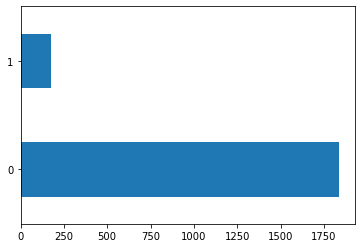

In [104]:
df["bad"].value_counts().plot.barh()

In [105]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bad,2018.0,0.088206,0.283665,0.00,0.0000,0.000,0.0000,1.000
loan,2018.0,19010.257681,10768.607345,1700.00,12000.0000,16900.000,23600.0000,89900.000
mortdue,2018.0,76337.035183,44476.368189,5076.00,49577.2500,67595.000,92922.7500,399412.000
value,2018.0,106899.244797,54026.707096,23031.00,71287.2500,94514.000,121220.7500,512650.000
yoj,2018.0,9.003964,7.573012,0.00,3.0000,7.000,13.0000,41.000
derog,2018.0,0.150149,0.580421,0.00,0.0000,0.000,0.0000,10.000
delinq,2018.0,0.264123,0.789816,0.00,0.0000,0.000,0.0000,10.000
clage,2018.0,180.645020,84.420116,0.49,118.2050,176.670,229.6925,1168.230
ninq,2018.0,1.037661,1.578414,0.00,0.0000,0.000,2.0000,13.000
clno,2018.0,22.265114,9.457238,0.00,16.0000,21.000,27.0000,64.000


In [106]:
y = df["bad"]
X = df.drop(["bad", "reason", "job"], axis=1)

In [107]:
loj = sm.Logit(y, X)
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.261768
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 2018
Model:                          Logit   Df Residuals:                     2008
Method:                           MLE   Df Model:                            9
Date:                Thu, 06 Aug 2020   Pseudo R-squ.:                  0.1227
Time:                        15:01:01   Log-Likelihood:                -528.25
converged:                       True   LL-Null:                       -602.11
Covariance Type:            nonrobust   LLR p-value:                 2.621e-27
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
loan       -2.706e-05   1.04e-05     -2.600      0.009   -4.74e-05   -6.66e-06
mortdue    -3.409e-07   5.22e-06     -0.065      0.948   -1.06e-05     9.9e-06
value      -3.173e-06   4.29e-06     -0.739      0.460   -1.16e-05    5.24e-06
yoj           -0.0342      0.013     -2.727      0.006      -0.059      -0.010
derog          0.5800      0.122      4.758      0.000       0.341       0.819
delinq         0.7398      0.086      8.610      0.000       0.571       0.908
clage         -0.0084      0.001     -6.358      0.000      -0.011      -0.006
ninq           0.0266      0.047      0.571      0.568      -0.065       0.118
clno          -0.0505      0.011     -4.635      0.000      -0.072      -0.029
debtinc        0.0222      0.007      3.126      0.002       0.008       0.036
==============================================================================
"""

In [108]:
loj = LogisticRegression(solver = 'liblinear')
loj_model = loj.fit(X, y)
loj_model

LogisticRegression(solver='liblinear')

In [109]:
loj_model.intercept_

array([-0.00026808])

In [110]:
loj_model.coef_

array([[-2.67914946e-05, -4.06703124e-06, -1.46768206e-06,
        -2.60132556e-03,  7.75463289e-04,  1.36341761e-03,
        -8.93012906e-03,  6.01034254e-04, -2.31189641e-03,
         5.32916344e-03]])

In [111]:
y_pred = loj_model.predict(X)

In [112]:
confusion_matrix(y, y_pred)

array([[1840,    0],
       [ 178,    0]], dtype=int64)

In [114]:
accuracy_score(y, y_pred)

0.9117938553022795

In [115]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1840
           1       0.00      0.00      0.00       178

    accuracy                           0.91      2018
   macro avg       0.46      0.50      0.48      2018
weighted avg       0.83      0.91      0.87      2018



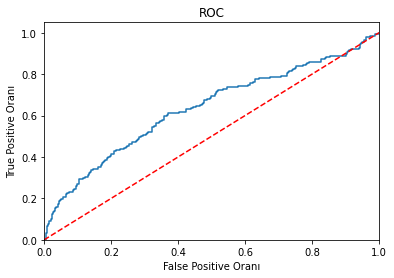

In [116]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [117]:
loj_model.predict(X)[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [118]:
loj_model.predict_proba(X)[:10][:,:2]

array([[0.92334133, 0.07665867],
       [0.81517638, 0.18482362],
       [0.97312036, 0.02687964],
       [0.84137091, 0.15862909],
       [0.805712  , 0.194288  ],
       [0.98495169, 0.01504831],
       [0.84668012, 0.15331988],
       [0.95609391, 0.04390609],
       [0.77871466, 0.22128534],
       [0.95865922, 0.04134078]])

In [119]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]

In [120]:
y_probs[:10]

array([0.07665867, 0.18482362, 0.02687964, 0.15862909, 0.194288  ,
       0.01504831, 0.15331988, 0.04390609, 0.22128534, 0.04134078])

In [121]:
y_pred = [1 if i > 0.2 else 0 for i in y_probs]

In [122]:
confusion_matrix(y, y_pred)

array([[1700,  140],
       [ 137,   41]], dtype=int64)

In [123]:
accuracy_score(y, y_pred)

0.8627353815659068

In [124]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1840
           1       0.23      0.23      0.23       178

    accuracy                           0.86      2018
   macro avg       0.58      0.58      0.58      2018
weighted avg       0.86      0.86      0.86      2018



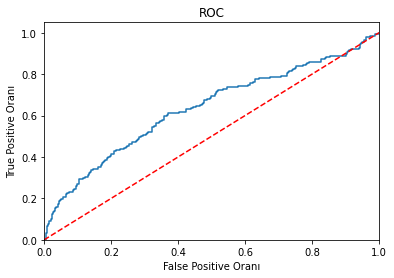

In [125]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [127]:
cross_val_score(loj_model, X_test, y_test, cv=10).mean()

0.9159146341463416

In [128]:
y_pred = loj_model.predict(X_test)

In [129]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       369
           1       0.00      0.00      0.00        35

    accuracy                           0.91       404
   macro avg       0.46      0.50      0.48       404
weighted avg       0.83      0.91      0.87       404



In [130]:
confusion_matrix(y_test, y_pred)

array([[369,   0],
       [ 35,   0]], dtype=int64)

In [133]:
df2 = df.drop(["mortdue", "value", "ninq"], axis=1)

In [134]:
df2

,bad,loan,reason,job,yoj,derog,delinq,clage,clno,debtinc
153,0,18200,DebtCon,Mgr,15.0,0.0,0.0,168.96,26.0,36.056
154,0,21700,DebtCon,Mgr,5.0,0.0,0.0,64.51,24.0,38.079
155,0,34100,DebtCon,Mgr,1.0,0.0,2.0,196.01,50.0,42.459
156,0,8400,HomeImp,Mgr,3.0,0.0,2.0,131.47,22.0,29.200
157,0,17400,DebtCon,Mgr,16.0,1.0,0.0,95.36,17.0,27.108
...,...,...,...,...,...,...,...,...,...,...
3544,1,7200,HomeImp,Self,6.0,0.0,1.0,354.24,42.0,33.624
3546,1,53400,HomeImp,Self,6.0,0.0,0.0,11.15,2.0,34.558
3547,1,27300,DebtCon,Self,3.0,0.0,0.0,300.57,45.0,32.560
3548,1,37300,HomeImp,Self,2.0,0.0,6.0,235.64,25.0,114.051


In [135]:
y = df2["bad"]
X = df2.drop(["bad", "reason", "job"], axis=1)

In [136]:
loj = sm.Logit(y, X)
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.262394
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 2018
Model:                          Logit   Df Residuals:                     2011
Method:                           MLE   Df Model:                            6
Date:                Thu, 06 Aug 2020   Pseudo R-squ.:                  0.1206
Time:                        15:25:33   Log-Likelihood:                -529.51
converged:                       True   LL-Null:                       -602.11
Covariance Type:            nonrobust   LLR p-value:                 8.032e-29
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
loan       -3.157e-05   9.72e-06     -3.250      0.001   -5.06e-05   -1.25e-05
yoj           -0.0338      0.012     -2.704      0.007      -0.058      -0.009
derog          0.6062      0.121      5.005      0.000       0.369       0.844
delinq         0.7538      0.085      8.837      0.000       0.587       0.921
clage         -0.0090      0.001     -7.021      0.000      -0.012      -0.006
clno          -0.0540      0.010     -5.270      0.000      -0.074      -0.034
debtinc        0.0200      0.007      3.076      0.002       0.007       0.033
==============================================================================
"""

In [137]:
loj = LogisticRegression(solver = 'liblinear')
loj_model = loj.fit(X, y)
loj_model

LogisticRegression(solver='liblinear')

In [138]:
y_pred = loj_model.predict(X)

In [139]:
confusion_matrix(y, y_pred)

array([[1827,   13],
       [ 151,   27]], dtype=int64)

In [140]:
accuracy_score(y, y_pred)

0.9187314172447968

In [141]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      1840
           1       0.68      0.15      0.25       178

    accuracy                           0.92      2018
   macro avg       0.80      0.57      0.60      2018
weighted avg       0.90      0.92      0.89      2018



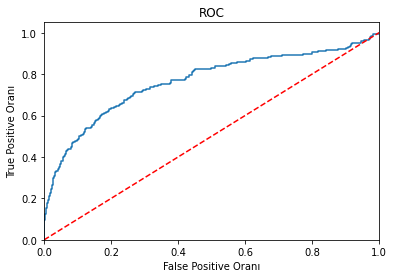

In [142]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [143]:
loj_model.predict_proba(X)[:10][:,:2]

array([[0.95895999, 0.04104001],
       [0.87819563, 0.12180437],
       [0.94901801, 0.05098199],
       [0.69156399, 0.30843601],
       [0.85566565, 0.14433435],
       [0.97622427, 0.02377573],
       [0.88930196, 0.11069804],
       [0.98195925, 0.01804075],
       [0.83487451, 0.16512549],
       [0.97853164, 0.02146836]])

In [163]:
y_pred = [1 if i > 0.4 else 0 for i in y_probs]

In [164]:
confusion_matrix(y, y_pred)

array([[1835,    5],
       [ 178,    0]], dtype=int64)

In [165]:
accuracy_score(y, y_pred)

0.9093161546085233

In [173]:
threshold = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
for j in threshold:
    y_pred = [1 if i > j else 0 for i in y_probs]
    print("threshold:%.2f" %j)
    print("accuracy: %.4f" %accuracy_score(y, y_pred))

threshold:0.10
accuracy: 0.6041
threshold:0.20
accuracy: 0.8627
threshold:0.30
accuracy: 0.9083
threshold:0.40
accuracy: 0.9093
threshold:0.50
accuracy: 0.9118
threshold:0.60
accuracy: 0.9118
threshold:0.70
accuracy: 0.9118
threshold:0.80
accuracy: 0.9118


In [175]:
cross_val_score(loj_model, X_test, y_test, cv=5).mean()

0.9257098765432099

In [176]:
cross_val_score(loj_model, X_test, y_test, cv=10).mean()

0.9159146341463416

In [177]:
cross_val_score(loj_model, X_test, y_test, cv=15).mean()

0.92326685660019

In [178]:
cross_val_score(loj_model, X_test, y_test, cv=7).mean()

0.9158240428657852

In [181]:
df

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3544,1,7200,15637.0,39660.0,HomeImp,Self,6.0,0.0,1.0,354.24,3.0,42.0,33.624
3546,1,53400,228236.0,305514.0,HomeImp,Self,6.0,0.0,0.0,11.15,0.0,2.0,34.558
3547,1,27300,106221.0,137727.0,DebtCon,Self,3.0,0.0,0.0,300.57,3.0,45.0,32.560
3548,1,37300,68789.0,86172.0,HomeImp,Self,2.0,0.0,6.0,235.64,2.0,25.0,114.051


In [200]:
df = pd.get_dummies(df)
df.astype('float64')
df

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,0,18200,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,1,0,1,0,0,0,0,0
154,0,21700,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,1,0,1,0,0,0,0,0
155,0,34100,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,1,0,1,0,0,0,0,0
156,0,8400,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200,0,1,1,0,0,0,0,0
157,0,17400,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3544,1,7200,15637.0,39660.0,6.0,0.0,1.0,354.24,3.0,42.0,33.624,0,1,0,0,0,0,0,1
3546,1,53400,228236.0,305514.0,6.0,0.0,0.0,11.15,0.0,2.0,34.558,0,1,0,0,0,0,0,1
3547,1,27300,106221.0,137727.0,3.0,0.0,0.0,300.57,3.0,45.0,32.560,1,0,0,0,0,0,0,1
3548,1,37300,68789.0,86172.0,2.0,0.0,6.0,235.64,2.0,25.0,114.051,0,1,0,0,0,0,0,1


In [201]:
y = df["bad"]
X = df.drop(["bad"], axis=1).astype('float64')

In [202]:
loj = sm.Logit(y, X)
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.228362
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 2018
Model:                          Logit   Df Residuals:                     2001
Method:                           MLE   Df Model:                           16
Date:                Thu, 06 Aug 2020   Pseudo R-squ.:                  0.2346
Time:                        16:13:24   Log-Likelihood:                -460.84
converged:                       True   LL-Null:                       -602.11
Covariance Type:            nonrobust   LLR p-value:                 1.039e-50
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
loan            -1.73e-05   1.05e-05     -1.640      0.101    -3.8e-05    3.37e-06
mortdue        -4.777e-06   4.76e-06     -1.004      0.315   -1.41e-05    4.55e-06
value           4.089e-06   4.06e-06      1.006      0.314   -3.87e-06    1.21e-05
yoj               -0.0109      0.013     -0.854      0.393      -0.036       0.014
derog              0.5708      0.130      4.382      0.000       0.315       0.826
delinq             0.7985      0.095      8.448      0.000       0.613       0.984
clage             -0.0046      0.001     -3.354      0.001      -0.007      -0.002
ninq               0.1119      0.049      2.303      0.021       0.017       0.207
clno              -0.0286      0.011     -2.627      0.009      -0.050      -0.007
debtinc            0.1143      0.014      8.222      0.000       0.087       0.142
reason_DebtCon    -3.7938        nan        nan        nan         nan         nan
reason_HomeImp    -3.8593        nan        nan        nan         nan         nan
job_Mgr           -1.4722        nan        nan        nan         nan         nan
job_Office        -2.0716        nan        nan        nan         nan         nan
job_Other         -1.5260        nan        nan        nan         nan         nan
job_ProfEx        -1.5377        nan        nan        nan         nan         nan
job_Sales         -0.2487        nan        nan        nan         nan         nan
job_Self          -0.7970        nan        nan        nan         nan         nan
==================================================================================
"""

In [191]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 153 to 3549
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   loan            2018 non-null   float64
 1   mortdue         2018 non-null   float64
 2   value           2018 non-null   float64
 3   yoj             2018 non-null   float64
 4   derog           2018 non-null   float64
 5   delinq          2018 non-null   float64
 6   clage           2018 non-null   float64
 7   ninq            2018 non-null   float64
 8   clno            2018 non-null   float64
 9   debtinc         2018 non-null   float64
 10  reason_DebtCon  2018 non-null   float64
 11  reason_HomeImp  2018 non-null   float64
 12  job_Mgr         2018 non-null   float64
 13  job_Office      2018 non-null   float64
 14  job_Other       2018 non-null   float64
 15  job_ProfEx      2018 non-null   float64
 16  job_Sales       2018 non-null   float64
 17  job_Self        2018 non-null  

In [203]:
loj = LogisticRegression(solver = 'liblinear')
loj_model = loj.fit(X, y)
loj_model

LogisticRegression(solver='liblinear')

In [204]:
y_pred = loj_model.predict(X)

In [205]:
confusion_matrix(y, y_pred)

array([[1835,    5],
       [ 177,    1]], dtype=int64)

In [206]:
accuracy_score(y, y_pred)

0.9098116947472745

In [216]:
y_pred = [1 if i > 0.15 else 0 for i in y_probs]

In [217]:
confusion_matrix(y, y_pred)

array([[1469,  371],
       [ 104,   74]], dtype=int64)

In [218]:
accuracy_score(y, y_pred)

0.7646184340931615

In [219]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1840
           1       0.17      0.42      0.24       178

    accuracy                           0.76      2018
   macro avg       0.55      0.61      0.55      2018
weighted avg       0.87      0.76      0.81      2018

